In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 54.8 gigabytes of available RAM

You are using a high-RAM runtime!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import pandas as pd

Mounted at /content/drive


In [ ]:
#!wget https://gdc-hub.s3.us-east-1.amazonaws.com/download/GDC-PANCAN.methylation450.tsv.gz
!wget https://gdc-hub.s3.us-east-1.amazonaws.com/download/GDC-PANCAN.survival.tsv
!wget https://tcga-pancan-atlas-hub.s3.us-east-1.amazonaws.com/download/Survival_SupplementalTable_S1_20171025_xena_sp
!wget https://gdc-hub.s3.us-east-1.amazonaws.com/download/GDC-PANCAN.basic_phenotype.tsv.gz


--2024-08-30 12:17:40--  https://gdc-hub.s3.us-east-1.amazonaws.com/download/GDC-PANCAN.survival.tsv
Resolving gdc-hub.s3.us-east-1.amazonaws.com (gdc-hub.s3.us-east-1.amazonaws.com)... 3.5.24.161, 16.182.106.218, 52.217.166.202, ...
Connecting to gdc-hub.s3.us-east-1.amazonaws.com (gdc-hub.s3.us-east-1.amazonaws.com)|3.5.24.161|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 714013 (697K) [text/tab-separated-values]
Saving to: ‘GDC-PANCAN.survival.tsv’

GDC-PANCAN.survival 100%[===================>] 697.28K  1.47MB/s    in 0.5s    

2024-08-30 12:17:41 (1.47 MB/s) - ‘GDC-PANCAN.survival.tsv’ saved [714013/714013]

--2024-08-30 12:17:41--  https://tcga-pancan-atlas-hub.s3.us-east-1.amazonaws.com/download/Survival_SupplementalTable_S1_20171025_xena_sp
Resolving tcga-pancan-atlas-hub.s3.us-east-1.amazonaws.com (tcga-pancan-atlas-hub.s3.us-east-1.amazonaws.com)... 16.182.69.210, 52.216.213.122, 52.216.160.70, ...
Connecting to tcga-pancan-atlas-hub.s3.us-east-1.a

In [ ]:
!wget https://gdc-hub.s3.us-east-1.amazonaws.com/download/GDC-PANCAN.methylation27.tsv.gz
!wget https://gdc-hub.s3.us-east-1.amazonaws.com/download/GDC-PANCAN.htseq_fpkm-uq.tsv.gz

--2024-08-30 12:17:43--  https://gdc-hub.s3.us-east-1.amazonaws.com/download/GDC-PANCAN.methylation27.tsv.gz
Resolving gdc-hub.s3.us-east-1.amazonaws.com (gdc-hub.s3.us-east-1.amazonaws.com)... 3.5.24.161, 16.182.106.218, 52.217.166.202, ...
Connecting to gdc-hub.s3.us-east-1.amazonaws.com (gdc-hub.s3.us-east-1.amazonaws.com)|3.5.24.161|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 536909692 (512M) [text/tab-separated-values]
Saving to: ‘GDC-PANCAN.methylation27.tsv.gz’

GDC-PANCAN.methylat 100%[===================>] 512.04M  19.3MB/s    in 28s     

2024-08-30 12:18:11 (18.5 MB/s) - ‘GDC-PANCAN.methylation27.tsv.gz’ saved [536909692/536909692]

--2024-08-30 12:18:12--  https://gdc-hub.s3.us-east-1.amazonaws.com/download/GDC-PANCAN.htseq_fpkm-uq.tsv.gz
Resolving gdc-hub.s3.us-east-1.amazonaws.com (gdc-hub.s3.us-east-1.amazonaws.com)... 52.216.33.114, 3.5.16.85, 52.217.229.210, ...
Connecting to gdc-hub.s3.us-east-1.amazonaws.com (gdc-hub.s3.us-east-1.amazona

In [ ]:
surv = pd.read_csv('Survival_SupplementalTable_S1_20171025_xena_sp', sep='\t')
meta_df = pd.read_csv('GDC-PANCAN.basic_phenotype.tsv.gz', sep='\t')
meth_cols = pd.read_csv('GDC-PANCAN.methylation27.tsv.gz', compression='gzip', sep='\t',nrows=0).columns
ge_cols = pd.read_csv('GDC-PANCAN.htseq_fpkm-uq.tsv.gz',compression='gzip', sep='\t', index_col=0, nrows=0).columns
surv_gdc = pd.read_csv('GDC-PANCAN.survival.tsv' , sep='\t')
surv_gdc = surv_gdc.set_index('sample')
print(surv_gdc.shape)
print(meta_df.shape)
meta_df = meta_df.set_index('sample')
gdc = meta_df.join(surv_gdc).reset_index()
gdc = gdc.set_index('_PATIENT')
surv = surv.set_index('_PATIENT')
gdc.rename(columns= {'OS': 'OS1', 'OS.time':'OS1.time'}, inplace = True)
gdc.rename(columns= {'sample': 'sample1'},inplace = True)
surv_gdc = pd.merge(gdc, surv, left_index=True, right_index=True)
surv_gdc = surv_gdc.dropna(axis=0, how='all')
surv_gdc.reset_index()
surv_gdc = surv_gdc.set_index('sample1')
print(meth_cols)
print(ge_cols)
## Metafile analysis
## Meta file analysis and label dictionary creation

c_list=[]
rs_list=[]
key_control = ['Blood Derived Normal','Bone Marrow Normal','Buccal Cell Normal','FFPE Scrolls','Solid Tissue Normal' ]
key_case = ['Additional - New Primary', 'Additional Metastatic','Human Tumor Original Cells','Metastatic','Primary Blood Derived Cancer - Bone Marrow','Primary Blood Derived Cancer - Peripheral Blood','Primary Tumor','Recurrent Blood Derived Cancer - Bone Marrow','Recurrent Blood Derived Cancer - Peripheral Blood','Recurrent Tumor']
meta_df_control = meta_df[meta_df['sample_type'].isin(key_control)]
meta_df_case = meta_df[meta_df['sample_type'].isin(key_case)]
label_dict = {}
s1 = list(set(meta_df_control.index) & set(ge_cols) & set(meth_cols))
pan_key_normal = []
pan_key_cancer = []
for k in s1:
  label_dict[k] = "C"
s2 = list(set(meta_df_case.index) &set(ge_cols) & set(meth_cols))
for k in s2:
  label_dict[k] = "RS"

## Finding normal and tumor samples in different cancers
##  dis_list --> s_tcga : [{key1:value1,key2:value2}]
s_tcga = {}
dis_list = meta_df['project_id'].unique()
for dis in dis_list:
  print(dis)
  print("%%%%%%%%%%%%%%%%%%")
  key_normal = []
  key_nan = []
  key_cancer = []

  meta_df1 = meta_df[meta_df['project_id'] == dis]
  meta_df1.reset_index(inplace = True)
  s_tcga_i ={}
  for i in range(0,meta_df1.shape[0]):
    if meta_df1['sample_type'][i] in key_control:
      key_normal.append(meta_df1['sample'][i])
      pan_key_normal.append(meta_df1['sample'][i])
    elif pd.isnull(meta_df1['sample_type'][i]):
      key_nan.append(meta_df1['sample'][i])
    else:
      key_cancer.append(meta_df1['sample'][i])
      pan_key_cancer.append(meta_df1['sample'][i])

  samples_to_use_i = []
  samples_to_use_i = key_normal + key_cancer
  key_normal = set(ge_cols) & set(meth_cols) & set(key_normal)
  key_normal = list(key_normal)
  key_cancer =  set(ge_cols) & set(meth_cols) & set(key_cancer)
  key_cancer = list(key_cancer)

  pan_key_normal = set(ge_cols) & set(meth_cols) & set(pan_key_normal)
  pan_key_normal = list(pan_key_normal)
  pan_key_cancer =  set(ge_cols) & set(meth_cols) & set(pan_key_cancer)
  pan_key_cancer = list(pan_key_cancer)
  s_tcga_i['normal'] = key_normal
  s_tcga_i['cancer'] = key_cancer
  if len(samples_to_use_i) != 0 :
    s_tcga[dis] = s_tcga_i

  C_count = len(key_normal)
  c_list.append(C_count)
  print(f"Control Samples :{C_count}")
  RS_count = len(key_cancer)
  rs_list.append(RS_count)
  print(f"Tumour Samples :{RS_count}")
C_count = len(pan_key_normal)
print(f"Pan Control Samples :{C_count}")
RS_count = len(pan_key_cancer)
print(f"Pan Tumour Samples :{RS_count}")
c_dict = {
  "disease": dis_list,
  "cancer_samples": rs_list,
  "normal samples": c_list
}
c_df = pd.DataFrame(c_dict)
print(c_df)

#c_df.to_csv("/content/drive/MyDrive/phd/disease_sample_count.csv")


(18492, 3)
(19188, 7)
Index(['Composite Element REF', 'TCGA-A2-A0EQ-01A', 'TCGA-A8-A081-01A',
       'TCGA-E2-A14T-01A', 'TCGA-A8-A09K-01A', 'TCGA-AN-A04C-01A',
       'TCGA-A8-A07B-01A', 'TCGA-A2-A0CP-01A', 'TCGA-A8-A07S-01A',
       'TCGA-AO-A12H-01A',
       ...
       'TCGA-BG-A0M7-01A', 'TCGA-A5-A0R9-01A', 'TCGA-AX-A0IU-01A',
       'TCGA-A5-A0R8-01A', 'TCGA-AP-A05H-01A', 'TCGA-B5-A0JN-01A',
       'TCGA-BG-A0M3-01A', 'TCGA-BK-A0CC-01A', 'TCGA-B5-A0K2-01A',
       'TCGA-AX-A06F-01A'],
      dtype='object', length=2596)
Index(['TCGA-OR-A5JP-01A', 'TCGA-OR-A5JE-01A', 'TCGA-OR-A5JG-01A',
       'TCGA-OR-A5L9-01A', 'TCGA-OR-A5JR-01A', 'TCGA-OR-A5KU-01A',
       'TCGA-OR-A5LS-01A', 'TCGA-OR-A5J7-01A', 'TCGA-OR-A5JQ-01A',
       'TCGA-OR-A5JS-01A',
       ...
       'TARGET-50-PAJMKJ-01A', 'TARGET-50-CAAAAQ-11A', 'TARGET-50-PAKSCC-01A',
       'TARGET-50-PAJNSL-11A', 'TARGET-50-PAJPAU-01A', 'TARGET-50-PAJNZU-01A',
       'TARGET-50-PAJNNR-01A', 'TARGET-50-PAJNTJ-02A', 'TARGET-50-PAECJB-

In [ ]:
## Sample selection
samples_to_use = pan_key_normal + pan_key_cancer
samples_to_use = list(samples_to_use)
print("Sample Size")
print(len(samples_to_use))
#pd.DataFrame(samples_to_use).to_csv("/content/drive/MyDrive/phd/s_gdc.csv")


Sample Size
1704


In [ ]:
import gc
gc.collect()

0

In [ ]:
### Creating dictionaries
!wget https://gdc-hub.s3.us-east-1.amazonaws.com/download/gencode.v22.annotation.gene.probeMap
!wget https://gdc-hub.s3.us-east-1.amazonaws.com/download/illuminaMethyl27_hg38_GDC

--2024-08-30 12:20:54--  https://gdc-hub.s3.us-east-1.amazonaws.com/download/gencode.v22.annotation.gene.probeMap
Resolving gdc-hub.s3.us-east-1.amazonaws.com (gdc-hub.s3.us-east-1.amazonaws.com)... 52.216.113.206, 52.216.222.178, 52.217.89.192, ...
Connecting to gdc-hub.s3.us-east-1.amazonaws.com (gdc-hub.s3.us-east-1.amazonaws.com)|52.216.113.206|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3243193 (3.1M) [binary/octet-stream]
Saving to: ‘gencode.v22.annotation.gene.probeMap’

gencode.v22.annotat 100%[===================>]   3.09M  5.16MB/s    in 0.6s    

2024-08-30 12:20:55 (5.16 MB/s) - ‘gencode.v22.annotation.gene.probeMap’ saved [3243193/3243193]

--2024-08-30 12:20:55--  https://gdc-hub.s3.us-east-1.amazonaws.com/download/illuminaMethyl27_hg38_GDC
Resolving gdc-hub.s3.us-east-1.amazonaws.com (gdc-hub.s3.us-east-1.amazonaws.com)... 52.216.113.206, 52.216.222.178, 52.217.89.192, ...
Connecting to gdc-hub.s3.us-east-1.amazonaws.com (gdc-hub.s3.us-east-

In [ ]:
map={}
meth_map = pd.read_csv('illuminaMethyl27_hg38_GDC', sep='\t')
map_dict_m = dict(zip(meth_map['#id'], meth_map['gene']))
map_mm = pd.read_csv('/content/drive/MyDrive/phd/cpg_methylation_cpg_to_annotation.tsv', sep='\t')
map_dict_mm = dict(zip(map_mm['CpG_id'], map_mm['Symbol']))
for (i,j) in map_dict_mm.items():
  if pd.isnull(j) or j=='.':
    map[i]=map_dict_m[i]
  else:
    k = map_dict_m[i]
    k_new = list(k.split(','))
    h = map_dict_mm[i]
    h_new = list(h.split(','))
    unique_values = set(k_new + h_new)
    if '.' in unique_values:
      unique_values.remove('.')
    map[i]=unique_values


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image,ImageOps,ImageEnhance
from glob import glob

from sklearn.model_selection import train_test_split
from sklearn import metrics

import cv2
import gc
import os

import tensorflow as tf
from tensorflow import keras
from keras import layers
from tensorflow.keras import activations
from io import BytesIO
import warnings
warnings.filterwarnings('ignore')

from tensorflow.keras import datasets,layers,models,Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from tensorflow.keras.preprocessing.image import img_to_array
!pip install keras-tuner
import keras_tuner as kt
from tensorflow import keras
import tensorflow as tf


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 5.7 MB/s eta 0:00:00


In [ ]:
ge = pd.read_csv('GDC-PANCAN.htseq_fpkm-uq.tsv.gz', compression='gzip', index_col=0, sep ='\t')
ge = ge.T

In [ ]:
ge.shape

(11768, 60483)

In [ ]:
ge.head()

xena_sample,ENSG00000242268.2,ENSG00000270112.3,ENSG00000167578.15,ENSG00000273842.1,ENSG00000078237.5,ENSG00000146083.10,ENSG00000225275.4,ENSG00000158486.12,ENSG00000198242.12,ENSG00000259883.1,...,ENSG00000238244.3,ENSG00000186115.11,ENSG00000216352.1,ENSG00000267117.1,ENSG00000273233.1,ENSG00000105063.17,ENSG00000231119.2,ENSG00000280861.1,ENSG00000123685.7,ENSG00000181518.3
TCGA-OR-A5JP-01A,0.000000,10.689655,18.536987,0.0,17.847476,17.092449,0.000000,7.645763,21.628175,10.917522,...,0.0,0.000000,0.0,12.722942,11.773066,19.730227,11.102080,0.0,11.102346,0.000000
TCGA-OR-A5JE-01A,0.000000,14.408626,18.684183,0.0,18.227483,17.161078,0.000000,5.543363,22.489617,0.000000,...,0.0,8.766763,0.0,0.000000,12.968313,18.747937,13.367429,0.0,13.675791,9.005429
TCGA-OR-A5JG-01A,0.000000,14.022621,17.334107,0.0,17.287893,18.260739,0.000000,7.634078,21.877272,10.584045,...,0.0,0.000000,0.0,12.711200,12.439242,19.723083,11.675085,0.0,10.938679,0.000000
TCGA-OR-A5L9-01A,0.000000,11.291444,19.713465,0.0,16.722624,18.003351,0.000000,0.000000,21.095333,0.000000,...,0.0,0.000000,0.0,13.827415,0.000000,18.493479,13.376072,0.0,13.528328,0.000000
TCGA-OR-A5JR-01A,9.486642,10.221394,16.761630,0.0,17.157762,19.528297,10.817554,6.108544,20.356000,10.951409,...,0.0,7.347722,0.0,12.979204,0.000000,18.643556,12.720505,0.0,12.505076,0.000000


### GE DATA + TUMOR/NORMAL

In [ ]:
ge.index

Index(['TCGA-OR-A5JP-01A', 'TCGA-OR-A5JE-01A', 'TCGA-OR-A5JG-01A',
       'TCGA-OR-A5L9-01A', 'TCGA-OR-A5JR-01A', 'TCGA-OR-A5KU-01A',
       'TCGA-OR-A5LS-01A', 'TCGA-OR-A5J7-01A', 'TCGA-OR-A5JQ-01A',
       'TCGA-OR-A5JS-01A',
       ...
       'TARGET-50-PAJMKJ-01A', 'TARGET-50-CAAAAQ-11A', 'TARGET-50-PAKSCC-01A',
       'TARGET-50-PAJNSL-11A', 'TARGET-50-PAJPAU-01A', 'TARGET-50-PAJNZU-01A',
       'TARGET-50-PAJNNR-01A', 'TARGET-50-PAJNTJ-02A', 'TARGET-50-PAECJB-01A',
       'TARGET-50-PALFRD-01A'],
      dtype='object', length=11768)

In [ ]:
label_dict={}
s1 = list(set(meta_df_control.index) & set(ge.index))
for k in s1:
  label_dict[k] = "C"
s2 = s1 = list(set(meta_df_case.index) & set(ge.index))
for k in s2:
  label_dict[k] = "RS"

In [ ]:
ge.shape

(11768, 60483)

In [ ]:
l_gid = pd.read_csv("/content/drive/MyDrive/phd/l_gid.csv")
l_gid = list(l_gid['0'])
len(l_gid)

115

In [ ]:
g_new=ge[l_gid]

In [ ]:
g_new.shape

(11768, 115)

In [ ]:
drop_in=[]
for i in g_new.index:
  if i.split("-")[0]=='TARGET':
    drop_in.append(i)
print(drop_in)

['TARGET-15-SJMPAL040026-09A', 'TARGET-15-SJMPAL040038-09B', 'TARGET-15-SJMPAL042799-09A', 'TARGET-15-SJMPAL043513-04B', 'TARGET-15-SJMPAL040036-03B', 'TARGET-15-SJMPAL044949-09A', 'TARGET-15-SJMPAL040035-03A', 'TARGET-15-SJMPAL043774-09B', 'TARGET-15-SJMPAL012421-09B', 'TARGET-20-SJAML045735-09A', 'TARGET-15-SJMPAL043773-40A', 'TARGET-15-SJMPAL042797-09A', 'TARGET-15-SJMPAL042946-09B', 'TARGET-15-SJMPAL016342-09A', 'TARGET-15-SJMPAL042794-09A', 'TARGET-15-SJMPAL043770-09B', 'TARGET-15-SJMPAL012422-09A', 'TARGET-15-SJMPAL042793-09B', 'TARGET-15-SJMPAL016344-09A', 'TARGET-20-SJAML045734-09A', 'TARGET-15-SJMPAL040037-09B', 'TARGET-15-SJMPAL040459-09B', 'TARGET-15-SJMPAL016448-09A', 'TARGET-15-SJMPAL042943-09A', 'TARGET-15-SJMPAL040025-09B', 'TARGET-15-SJMPAL042801-09A', 'TARGET-15-SJMPAL041120-09B', 'TARGET-15-SJMPAL016342-09B', 'TARGET-15-SJMPAL043769-03B', 'TARGET-15-SJMPAL011911-03A', 'TARGET-15-SJMPAL046466-09A', 'TARGET-15-SJMPAL042791-09B', 'TARGET-15-SJMPAL040034-09A', 'TARGET-15-

In [ ]:
label_dict['nan']="RS"

In [ ]:
g_df = ge[l_gid]
g_df=g_df.dropna(axis='columns')
g_df = g_df.drop(drop_in)
print(g_df.shape)
sample_type =[]
for i in g_df.index:
  sample_type.append(label_dict[i])
label =pd.DataFrame(sample_type).to_numpy()
g_df=g_df.to_numpy()

(11058, 115)


In [ ]:
X_train, X_test, y_tr, y_tst = train_test_split(g_df,label,test_size = 0.3,random_state = 42)
print(X_train.shape, X_test.shape)

(7740, 115) (3318, 115)


In [ ]:
p=0
n=0
for i,y in enumerate(y_tr):
  if y=='RS':
    y_tr[i]=1
    p+=1
  else:
    y_tr[i]=0
    n+=1
print(p,n)

7238 502


In [ ]:
y_train = y_tr.flatten()

print(y_train)

[1 1 1 ... 1 1 1]


In [ ]:
p=0
n=0
for i,y in enumerate(y_tst):
  if y=='RS':
    y_tst[i]=1
    p+=1
  else:
    y_tst[i]=0
    n+=1
print(p,n)

3090 228


In [ ]:
y_test = y_tst.flatten()

print(y_test)

[1 1 1 ... 1 1 1]


In [ ]:
#import numpy as np
#from imblearn.over_sampling import RandomOverSampler
#ros = RandomOverSampler(random_state=42)

# Perform random oversampling
#X_train, y_train = ros.fit_resample(X_tr, y_tr)

#print("Original dataset shape:", X_tr.shape)
#print("Resampled dataset shape:", X_train.shape)

#print("Original class distribution:", np.bincount(y_tr.flatten))
#print("Resampled class distribution:", np.bincount(y_train))

In [ ]:
#from imblearn.over_sampling import SMOTE
#print("Before SMOTE - Tumor samples:", sum(y_tr == "RS"))
#print("Before SMOTE - Normal samples:", sum(y_tr == "C"))
#print("Before SMOTE - Tumor samples:", sum(y_tst == "RS"))
#print("Before SMOTE - Normal samples:", sum(y_tst == "C"))
#smote = SMOTE(random_state=42)
#X_train, y_train = smote.fit_resample(X_tr, y_tr)
#print("After SMOTE - Tumor samples:", sum(y_train == "RS"))
#print("After SMOTE - Normal samples:", sum(y_train == "C"))

In [ ]:
#for i,y in enumerate(y_train):
 # if y=='RS':
  #  y_train[i]=1
  #else:
    #y_train[i]=0

In [ ]:
#for i,y in enumerate(y_tst):
 # if y=='RS':
  #  y_tst[i]=1
  #else:
   # y_tst[i]=0

In [ ]:
#y_test = y_tst.flatten()

#print(y_test)

In [ ]:
print(type(X_train))
print(type(y_train))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

In [ ]:
y_train = y_train.astype(int)

In [ ]:
import csv

# Define the CSV file path
results_file = '/content/drive/MyDrive/phd/pancan/Revised5/model_results.csv'

In [ ]:
import numpy as np
np.random.seed(42)
import random
random.seed(42)
tf.config.experimental.enable_op_determinism()
import os
os.environ['PYTHONHASHSEED'] = '42'
os.environ['TF_DETERMINISTIC_OPS'] = '1'
os.environ['CUDA_VISIBLE_DEVICES'] = '0'

In [ ]:
import tensorflow as tf
tf.random.set_seed(42)
import tensorflow as tf
import keras_tuner as kt
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve, auc, confusion_matrix, f1_score
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_auc_score

# Define the model builder
def model_builder1(hp):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten(input_shape=X_train[0].shape))

    hp_activation = hp.Choice('activation', values=['relu', 'tanh'])
    hp_layer_1 = hp.Int('layer_1', min_value=1, max_value=1000, step=100)
    #model.add(keras.layers.Dropout(0.2))
    hp_layer_2 = hp.Int('layer_2', min_value=1, max_value=500, step=100)
    #model.add(keras.layers.Dropout(0.2))
    hp_layer_3 = hp.Int('layer_3', min_value=1, max_value=250, step=100)
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    model.add(tf.keras.layers.Dense(units=hp_layer_1, activation=hp_activation))
    model.add(tf.keras.layers.Dense(units=hp_layer_2, activation=hp_activation))
    model.add(tf.keras.layers.Dense(units=hp_layer_3, activation=hp_activation))
    model.add(tf.keras.layers.Dense(2, activation='softmax'))

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=hp_learning_rate),
                loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                metrics=['accuracy'])

    return model
def hypr_para_tuning(X, y):
  # Hyperparameter tuning
        tuner = kt.RandomSearch(
            model_builder1,
            objective='val_accuracy',
            max_trials=5,###########################################################20
            executions_per_trial=3,
            #overwrite=True,
            directory='DIR1',
            project_name='tumor_vs_normal'
        )
        class PrintHyperparameters(tf.keras.callbacks.Callback):
            def on_trial_begin(self, trial):
                print("Trial hyperparameters:", trial.hyperparameters.values)
        tuner.search(X, y, epochs=20, validation_split = 0.2)   ########################100
        best_model = tuner.get_best_models(num_models=1)[0]
        best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]
        print(f"Best Hyperparameters: {best_hyperparameters}")
        print(best_model.summary())
        print(f"Best Validation Score: {np.max(tuner.results_summary())}")
        return best_model, best_hyperparameters


In [ ]:
# Use the best hyperparameters found to train on the entire training dataset
def train_final_model(X_train, y_train, X_val, y_val, final_best_hyperparameters,fold_no):
    final_model = model_builder1(final_best_hyperparameters)
    history = final_model.fit(X_train, y_train, epochs=300, validation_data=(X_val, y_val),verbose=0)
    plt.figure(figsize=(12, 4))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Training and Validation Accuracy')

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training and Validation Loss')

    # Save plot to file
    plt.savefig(f'/content/drive/MyDrive/phd/pancan/Revised5/plots/accuracy_loss{fold_no}.png')
    plt.close()

    return final_model


In [ ]:
def evaluate_model(X, y, n_splits=5):
    # Hyperparameter tuning
    best_model, best_hyperparameters = hypr_para_tuning(X, y)

    # Evaluate the model
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    acc_scores, prec_scores, rec_scores, fpr_scores, fnr_scores = [], [], [], [], []
    validation_losses = []
    #best_hyperparameters = []
    fold_thr = []
    best_scores = []
    f1s = []
    fold_no = 1
    data_to_write = ['fold_no', 'fold_accuracies','fold_loss', 'fold_precision', 'fold_recalls', 'fold_fpr', 'fold_fnr','fold_aucs','fold_f1','fold_thr']
    for train_index, val_index in skf.split(X, y):
      with open(results_file, mode='a', newline='') as file:
        writer = csv.writer(file)
        if file.tell() == 0:
            writer.writerow(data_to_write)
        X_train_fold, X_val_fold = X[train_index], X[val_index]
        y_train_fold, y_val_fold = y[train_index], y[val_index]
        #best_model.fit(X_train_fold, y_train_fold, epochs=300)
        b_model = train_final_model(X_train_fold, y_train_fold, X_val_fold, y_val_fold, best_hyperparameters,fold_no)
        val_loss, val_accuracy = b_model.evaluate(X_val_fold, y_val_fold)
        validation_losses.append(val_loss)
        y_pred_prob = b_model.predict(X_val_fold)
        y_pred_prob = y_pred_prob[:, 1]
        precision, recall, thresholds = precision_recall_curve(y_val_fold, y_pred_prob)

        f1_scores = [f1_score(y_val_fold, y_pred_prob >= t) for t in thresholds]
        optimal_idx = np.argmax(f1_scores)
        f1 = f1_scores[optimal_idx]
        f1s.append(f1)
        optimal_threshold = thresholds[optimal_idx]
        fold_thr.append(optimal_threshold)
        y_pred = (y_pred_prob >= optimal_threshold).astype(int)

        # Evaluate the model
        #y_pred = np.argmax(best_model.predict(X_val_fold), axis=1)
        acc = accuracy_score(y_val_fold, y_pred)
        acc_scores.append(acc)
        prec = precision_score(y_val_fold, y_pred)
        prec_scores.append(prec)
        rec = recall_score(y_val_fold, y_pred)
        rec_scores.append(rec)
        score = accuracy_score(y_val_fold, y_pred)
        best_scores.append(score)
        aucs = roc_auc_score(y_val_fold, y_pred)
        # Confusion Matrix
        tn, fp, fn, tp = confusion_matrix(y_val_fold, y_pred).ravel()
        fpr = fp / (fp + tn)
        fnr = fn / (fn + tp)
        fpr_scores.append(fpr)
        fnr_scores.append(fnr)
        writer.writerow([fold_no, acc,val_loss, prec, rec,fpr, fnr, aucs,f1,optimal_threshold])


        # ROC Curves
        fpr, tpr, _ = roc_curve(y_val_fold, y_pred, pos_label=1)
        plt.plot(fpr, tpr)
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve')
        plt.legend()
        plt.savefig(f'/content/drive/MyDrive/phd/pancan/Revised5/plots/fpr_tpr{fold_no}.png')
        plt.close()

        plt.plot(recall, precision, marker='.')
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title('Precision-Recall Curve')
        plt.legend()
        plt.savefig(f'/content/drive/MyDrive/phd/pancan/Revised5/plots/rec_prec{fold_no}.png')
        plt.close()
        fold_no += 1


    avg_threshold = np.mean(fold_thr)
    print(f"Average Accuracy: {np.mean(acc_scores)}")
    print(f"Average Loss: {np.mean(validation_losses)}")
    print(f"Average Precision: {np.mean(prec_scores)}")
    print(f"Average Recall: {np.mean(rec_scores)}")
    print(f"Average FPR: {np.mean(fpr_scores)}")
    print(f"Average FNR: {np.mean(fnr_scores)}")
    print(f"Average f1 score: {np.mean(f1s)}")
    print(f"Average AUC: {np.mean(aucs)}")
    ## TRain final model
    final_model = model_builder1(best_hyperparameters)
    final_model.fit(X, y, epochs=300)
    return final_model, avg_threshold

In [ ]:
y_test = y_test.astype(int)

In [ ]:
def evaluate_on_test_set(final_model, X_test, y_test, avg_threshold):

    t_loss, t_acc = final_model.evaluate(X_test, y_test)
    y_pred_probs = final_model.predict(X_test)  # Get predicted probabilities
    y_pred = (y_pred_probs[:,1] >= avg_threshold).astype(int)
    #y_pred = np.argmax(y_pred_probs, axis=1)  # Convert probabilities to class labels (0 or 1)
    y_prob = y_pred_probs[:, 1]

    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    fpr, tpr, _ = roc_curve(y_test, y_prob, pos_label=1)
    roc_auc = auc(fpr, tpr)

    print(f"Test Accuracy: {t_acc}")
    print(f"Test Loss: {t_loss}")
    print(f"Test Accuracy: {accuracy}")
    print(f"Test Precision: {precision}")
    print(f"Test Recall: {recall}")
    print(f"Test ROC AUC: {roc_auc}")
    #print(f"fpr{fpr}")
    #print(f"tpr{tpr}")
   # tn, fp, fn, tp = confusion_matrix(X_test, y_test).ravel()
    #fpr = fp / (fp + tn)
    #fnr = fn / (fn + tp)

    precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
    fnr = 1 - recall

    # Select the threshold with the lowest FNR
    optimal_idx = np.argmin(fnr)
    optimal_threshold = thresholds[optimal_idx]
    f1_scores = [f1_score(y_test, y_prob >= t) for t in thresholds]
    optimal_idx = np.argmax(f1_scores)
    f1 = f1_scores[optimal_idx]
    #optimal_threshold = thresholds[optimal_idx]
    #y_pred = (y_prob >= optimal_threshold).astype(int)

   # print(f"Test FPR: {fpr}")
   # print(f"Test FNR: {fnr}")
    print(f"Test f1 score: {f1}")
    print(f"Test threshold: {optimal_threshold}")
    # Plot ROC Curve
    '''
    plt.figure()
    plt.plot(fpr, tpr, label=f'ROC Curve (area = {roc_auc:.2f})')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()

    # Plot Precision vs. Recall Curve
    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    plt.figure()
    plt.plot(recall, precision, marker='.')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision vs. Recall Curve')
    plt.grid(True)
    plt.show()
'''
    cm = confusion_matrix(y_test,y_pred)
    class_names = ['Normal', 'Tumor']  # Assuming 'Tumor' is the positive class

    # Create a heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix Heatmap')
    plt.show()




In [ ]:
final_model, avg_threshold = evaluate_model(X_train, y_train)

Trial 5 Complete [00h 00m 52s]
val_accuracy: 0.9192506670951843

Best val_accuracy So Far: 0.9812661409378052
Total elapsed time: 00h 04m 17s
Best Hyperparameters: <keras_tuner.src.engine.hyperparameters.hyperparameters.HyperParameters object at 0x7f58af271270>


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 115)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 501)                 │          58,116 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 201)                 │         100,902 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 201)                 │          40,602 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2)                   │             404 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 200,024 (781.34 KB)

 Trainable params: 200,024 (781.34 KB)

 Non-trainable params: 0 (0.00 B)

None
Results summary
Results in DIR1/tumor_vs_normal
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 1 summary
Hyperparameters:
activation: tanh
layer_1: 501
layer_2: 201
layer_3: 201
learning_rate: 0.001
Score: 0.9812661409378052

Trial 0 summary
Hyperparameters:
activation: tanh
layer_1: 701
layer_2: 101
layer_3: 101
learning_rate: 0.001
Score: 0.9806201457977295

Trial 2 summary
Hyperparameters:
activation: tanh
layer_1: 201
layer_2: 201
layer_3: 1
learning_rate: 0.01
Score: 0.9192506670951843

Trial 3 summary
Hyperparameters:
activation: tanh
layer_1: 601
layer_2: 1
layer_3: 101
learning_rate: 0.001
Score: 0.9192506670951843

Trial 4 summary
Hyperparameters:
activation: relu
layer_1: 701
layer_2: 1
layer_3: 201
learning_rate: 0.01
Score: 0.9192506670951843
Best Validation Score: None
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9851 - loss: 0.0600
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9747 - loss: 0.0866
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9810 - loss: 0.0809
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9857 - loss: 0.0683
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9796 - loss: 0.0862
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


Average Accuracy: 0.9834625322997417
Average Loss: 0.07973979488015175
Average Precision: 0.9892838259799716
Average Recall: 0.9930924908459874
Average FPR: 0.15532673267326733
Average FNR: 0.006907509154012684
Average f1 score: 0.9911743654952216
Average AUC: 0.9134227866463218
Epoch 1/300
242/242 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9316 - loss: 0.1935
Epoch 2/300
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9738 - loss: 0.0745
Epoch 3/300
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9784 - loss: 0.0678
Epoch 4/300
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9761 - loss: 0.0661
Epoch 5/300
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9731 - loss: 0.0698
Epoch 6/300
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9778 - loss: 0.0665
Epoch 7/300
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9803 - loss: 0.0585
Epoch 8/300
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9810 - loss: 0.0558
Epoch 9/300
242/242 ━━━━

In [ ]:
avg_threshold

0.25723308

104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9709 - loss: 0.0839
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Test Accuracy: 0.9710668921470642
Test Loss: 0.07962624728679657
Test Accuracy: 0.9671488848704038
Test Precision: 0.9676812048948855
Test Recall: 0.9980582524271845
Test ROC AUC: 0.9753690455913246


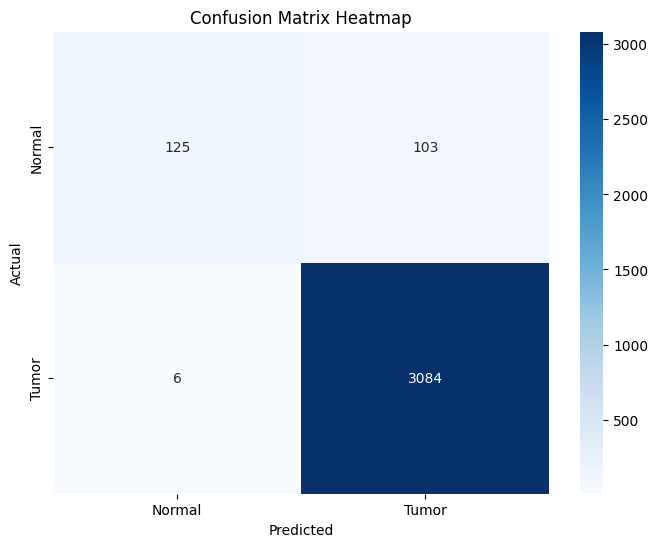

In [ ]:
import seaborn as sns
evaluate_on_test_set(final_model, X_test, y_test, avg_threshold)

In [ ]:
final_model.save("final_model.h5")